# TIME SERIES 
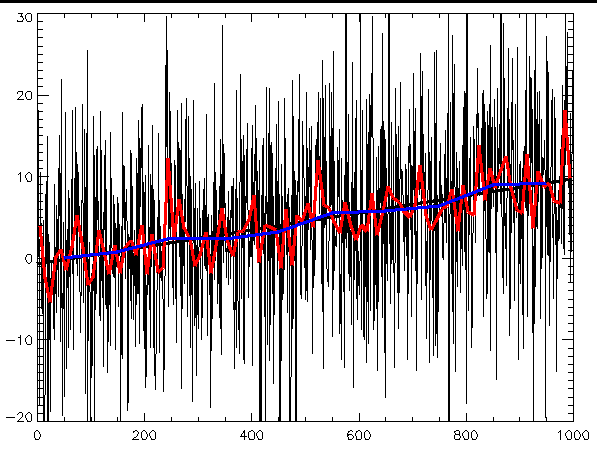

A time series is a sequence of numerical data points in successive order. In investing, it tracks the movement of the chosen data points at regular intervals and over a specified period of time.
So how is this different then just a basic forecast?


Components for Time Series Analysis

    Trend.
    Seasonal Variations.
    Cyclic Variations.
    Random or Irregular movements.

In [1]:
%matplotlib inline
import pandas as pd
# Load the data and set the DateTime index
data = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//rossmann.csv', skipinitialspace=True, low_memory=False)
print(data.shape)
data.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Because we are most interested in the Date column that contains the date of sales for each store, we will make sure to process that as a DateTime type, and make that the index of our dataframe.

In [2]:
data['Date2'] = pd.to_datetime(data['Date'])
type(data.Date2)

pandas.core.series.Series

In [3]:
data['Date2'].dt.year

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: Date2, Length: 1017209, dtype: int32

In [4]:
data.Date.dtype

dtype('O')

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day


In [6]:
data.shape

(1017209, 12)

In [7]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2,Year,Month,Day
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015-07-31,2015,7,31
2015-07-31,2,5,6064,625,1,1,0,1,2015-07-31,2015,7,31
2015-07-31,3,5,8314,821,1,1,0,1,2015-07-31,2015,7,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015-07-31,2015,7,31
2015-07-31,5,5,4822,559,1,1,0,1,2015-07-31,2015,7,31


In [8]:
store1_data = data[data.Store == 1]
type(store1_data)

pandas.core.frame.DataFrame

In [9]:
store1_data.shape

(942, 12)

Data Exploration and MINEing

To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days. On state holidays the store is closed (and as a nice sanity check there are 0 sales)


C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


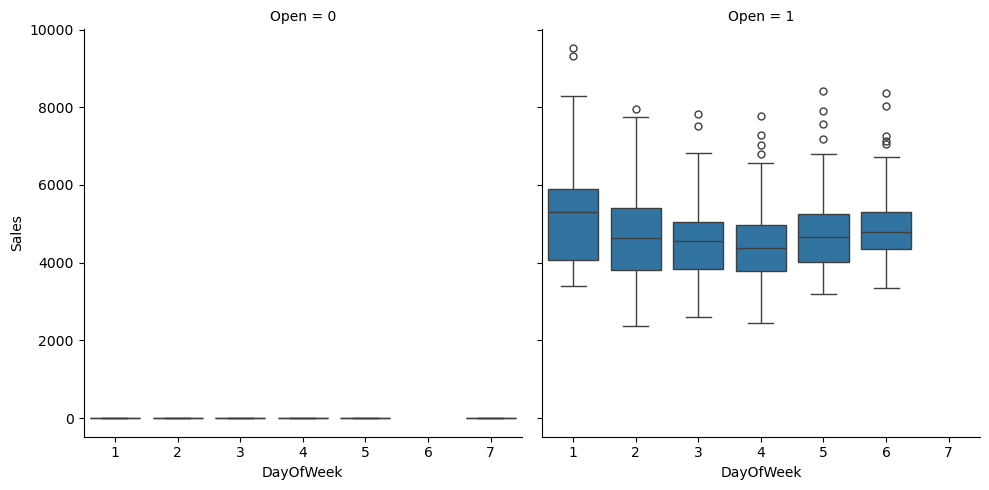

In [10]:

import seaborn as sns
%matplotlib inline
sns.catplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box' 
)

C:\Users\Matth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


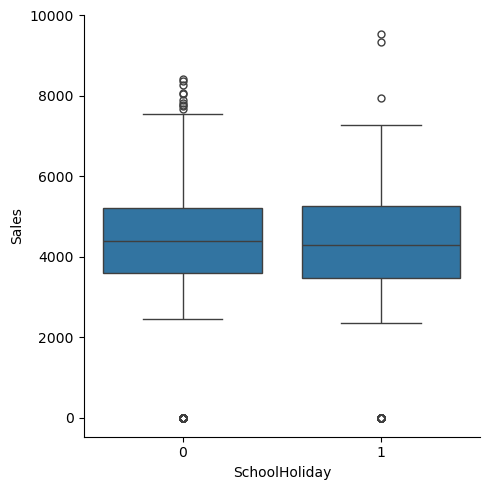

In [11]:
sns.catplot(
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

What does the plot above tell us about school holiday's vs. regular days?

    Check: See if there is a difference affecting sales on promotion days.

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?


<Axes: xlabel='Date'>

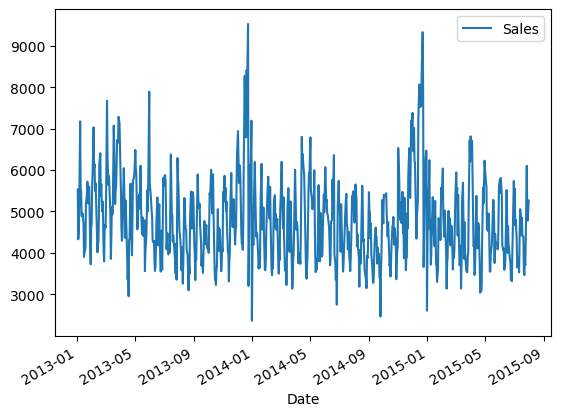

In [12]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()
#store1_data[['Sales']].plot()
#store1_open_data[['Sales','Customers']].plot()

is our past reflective or our present or future ie are there some trends and how can we tell beyond spot checking?

### Autocorr or Autocorrelation
summary notes from a great article: https://www.investopedia.com/terms/a/autocorrelation.asp
Correlation measures the relationship between two variables, whereas autocorrelation measures the relationship of a variable with lagged values of itself.
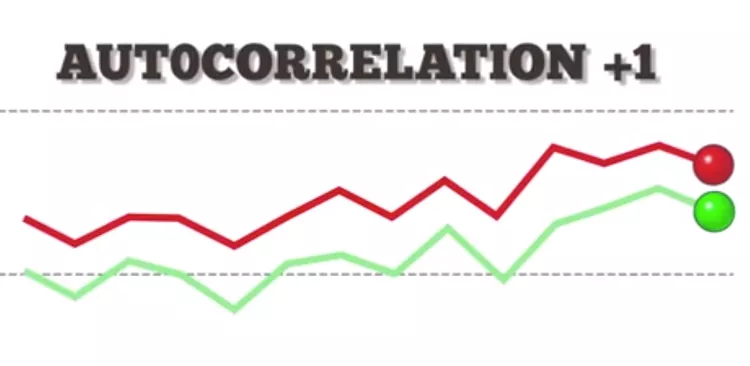

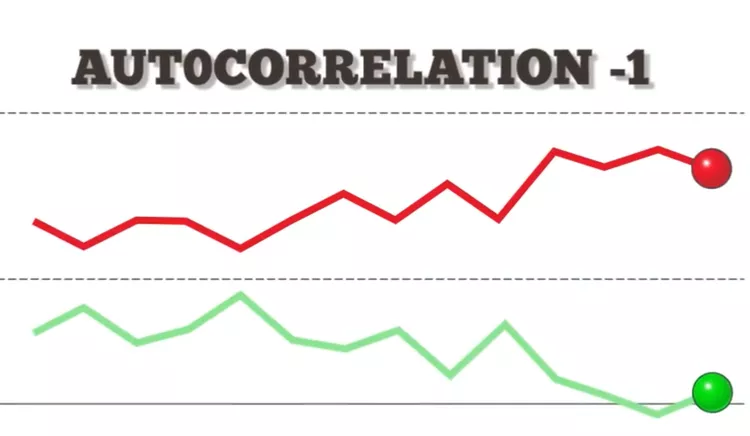

- Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
- Autocorrelation measures the relationship between a variable's current value and its past values.
- An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of -1 represents a perfect negative correlation.
- Technical analysts can use autocorrelation to measure how much influence past prices for a security have on its future price.

In [15]:
# autocorrelation the degree of correlation over time: like R looking for close to perfect positive and perfect negative
data['Sales'].resample('M').mean().autocorr(lag=12)

0.8072797016452746

Data Refining Using Time Series Statistics


If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates. 

We want to know what the mean and median sales were for each month and year.

In Pandas, this is performed using the resample command, which is very similar to the groupby command. It allows us to group over different time intervals.

We can use data.resample and provide as arguments: - 

The level on which to roll-up to, 
- 'D' for day 
- 'W' for week 
- 'M' for month
- 'A' for year 

What aggregation to perform: 'mean', 'median', 'sum', etc.


In [16]:
data[['Sales']].resample('M').mean().head()

,Sales
Date,
2013-01-31,5211.555578
2013-02-28,5494.371397
2013-03-31,5820.349168
2013-04-30,5483.749836
2013-05-31,5364.127383


In [17]:
data[['Sales']].resample('M').median().head()

,Sales
Date,
2013-01-31,5194.0
2013-02-28,5421.5
2013-03-31,5844.0
2013-04-30,5464.0
2013-05-31,5585.0


While identifying the monthly averages are useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps a few days surrounding it. We can do this using rolling averages.

In pandas we can compute rolling average using the pd.rolling_mean or pd.rolling_median functions.

In [18]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].rolling(window=3, center=True).mean().head()

,Sales
Date,
2015-07-31,NaN
2015-07-30,5021.666667
2015-07-29,4937.666667
2015-07-28,5298.333333
2015-07-27,5159.000000


<Axes: xlabel='Date'>

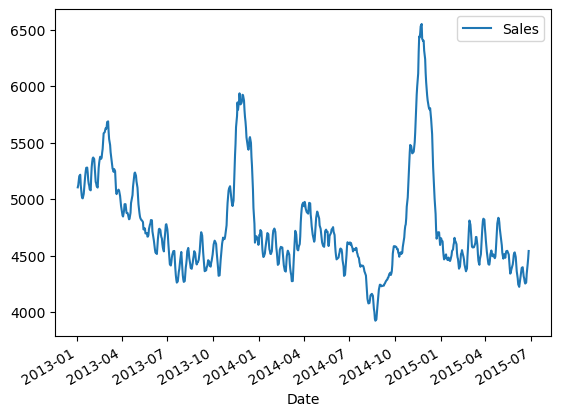

In [19]:
store1_open_data[['Sales']].rolling(window=30).mean().plot()

Let's take this stock example. the moving average smooths out the volatile numbers to give us some stability by asking what is the average but wait, what is the average over x number of days and then keep that moving or rolling forward. 

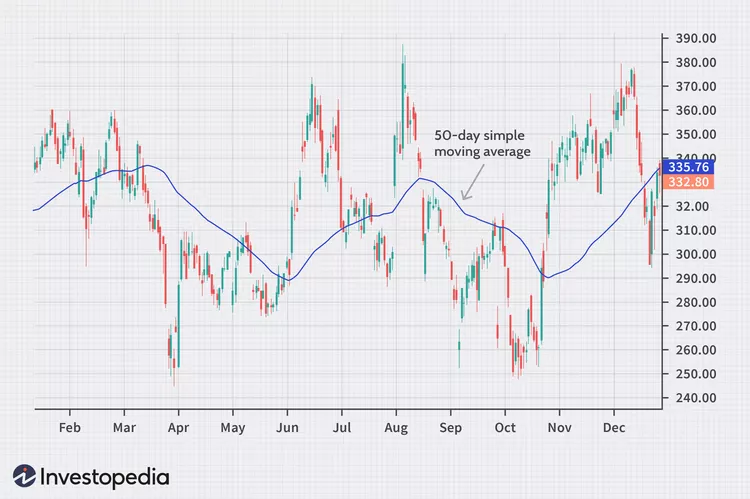

### SUMMARY 
- What we have done so far is spent a little time doing some basic EDA. We learned that
- Store can be closed and that will effect our data
- We learned there are promotions and we may need to account for those promtions. 
- We learnd through autocorrelation that is somewhat of a predictable trend.
- We created a moving average to begin to see that trend. 


Next we will go deeper into Time Series and build on these concepts of AutoCorrelation which is an evaluation of AutoRegression(AR) and the concept of moving averages(MA)
what happens when we put them together we get ARMA or even better ARIMA(Auto Regressive Integrated Moving Average)

Pandas Window functions

Pandas rolling_mean and rolling_median are only two examples of Pandas window function capabilities. Window functions operate on a set of N consecutive rows (a window) and produce an output.

In addition to rolling_mean and rolling_median, there are rolling_sum, rolling_min, rolling_max... and many more.

Another common one is diff, which takes the difference over time. pd.diff takes one arugment, periods, which is how many prior rows to use for the difference.


### Exercises

In [20]:
# computes the average sales, from the first date _until_ the date specified.
store1_open_data[['Sales']].sort_index().expanding(min_periods=1).sum()

,Sales
Date,
2013-01-02,5530.0
2013-01-03,9857.0
2013-01-04,14343.0
2013-01-05,19340.0
2013-01-07,26516.0
...,...
2015-07-27,3696778.0
2015-07-28,3701789.0
2015-07-29,3706571.0


- Plot the distribution of sales by month and compare the effect of promotions

- Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

- Plot the 15 day rolling mean of customers in the stores
Identify the date with largest drop in sales from the same date in the previous month
Compute the total sales up until Dec. 2014

- Bonus 1: When were the largest differences between 15-day moving/rolling averages? HINT: Using rolling_mean and diff
- Bonus 2: Plot a 15 day exponentially weighted rolling mean of sales in stores HINT: We did not specifically do an example of this so you will have to search for info on that Pandas rollig type



## TIME SERIES MODELING

Explore time series models, we will continue with the Rossmann sales data. This dataset has sales data for every Rossmann store for a 3-year period, as well as indicators of holidays and basic store information.

In the last class, we saw that we would plot the sales data at a particular store to identify how the sales changed over time. Additionally, we computed autocorrelation for the data at varying lag periods. This helps us identify if previous timepoints are predictive of future data and which time points are most important - the previous day? week? month?
https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

We will start from the beginning again: just to refresh on the process. 

I have also included a list of standard libraries you may use in any given data science project. This is not exhaustive just and example template. 

In [ ]:
#example of a standard load
#### LOAD LIBRARIES
##### system
import sys, os
from time import time

##### Data
import pandas as pd
import numpy as np


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

#### PreProcessing Test train split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion


#### Models
from sklearn.cluster import KMeans


#### Evaluation of Models
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error as MSE

import warnings
warnings.filterwarnings('ignore')

### EDA and some basic prep

In [ ]:
%matplotlib inline
import pandas as pd
# Load the data and set the DateTime index
data = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//rossmann.csv', 
                   skipinitialspace=True, 
                   index_col = 'Date',
                   parse_dates = True,
                   low_memory=False)
# data['Date'] = pd.to_datetime(data['Date'])
data.head()

In [ ]:
data[['Sales']].plot()
plt.title("Time")
plt.ylabel("$")
plt.show();

In [ ]:
# lets take a look at 1 store
# Filter to Store 1
store = data[data.Store == 1]

In [ ]:
store[['Sales']].plot()
plt.title("Time")
plt.ylabel("$")
plt.show();

In [ ]:
# Filter to Store 1
store_open= store[store.Open == 1]

In [ ]:
store_open[['Sales']].plot()
plt.title("Time")
plt.ylabel("$")
plt.show();

In [ ]:
import datetime
store_open['Date'] = (pd.date_range(start=datetime.datetime(2013, 1, 1),
                           periods=store_open.shape[0], freq='24H'))
store_open.set_index('Date', inplace = True)
store_open

In [ ]:
store_open.info()

## Choosing the model type
In the previous section we jumped right into Autocorrelation to essentially begin our modeling setps. This would assume that our data has a pattern of some kind that we can track. A better idea would be to look at the spread of our data and see if this would be good for autogressive models(ie ARIMA) or sinusoidal models. More often then not and especially in retail, accounting or investing you will likely be using Arima styled models. However, it is possible you may run into sinusoidal models. So how do you tell the difference? What are these things?

# Term
Lagging and shifting are ways to understand previous days sales vs todays sales or last 5 days returns. 
We have done this concept a lot in excel when we subtract a date of sales from a previous data of sales. 

a lag plot is a good starting point to understand some clues into our data and what kind of model to use.

    A linear shape to the plot suggests that an autoregressive model is probably a better choice.
    An elliptical plot suggests that the data comes from a single-cycle sinusoidal model.
    
    - autoregressive(predicting future values based on past values)
    - sinusoidal model( sinusoidal is looking for the curve more on this in a minute)

![lp-outliers.webp](attachment:lp-outliers.webp)

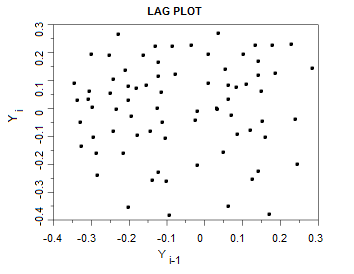

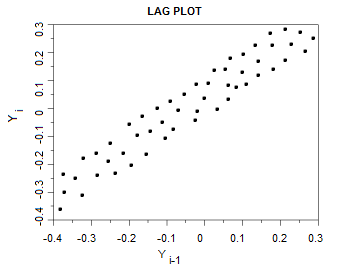

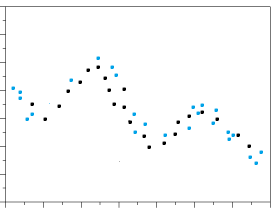

concept of sinusoidal
first it comes from the Math term of Sine
The sine function can be defined as the ratio of the length of the opposite side to that of the hypotenuse in a right-angled triangle. The sine function is used to find the unknown angle or sides of a right triangle.

sinusoidal: of, relating to, shaped like, or varying according to a sine curve or sine wave

Think about the tide coming into a beach and the hieght of it
at the highest point it is 12am and 10ft 8hrs later at 8am at the lowest that is 2ft
there would not be a straight line but there would be a curve over time to show the first part of this cycle. The second part of the cycle is the tide rising again. 
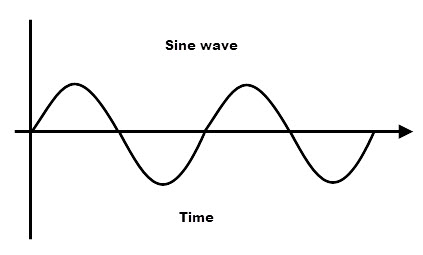

In [ ]:
# import lag_plot function
from pandas.plotting import lag_plot
# lag scatter plot
lag_plot(store_open)
plt.show()

Here is some interesting data in here, what do you see? do you think sinusodal ie no clear patterns or autoregressive clear patterns. 

if you find yourself with sinusodial data there is some detail review that can assist in the python documentation
it is out of scope for the class content but you should be aware of it's existance
https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html

### Back to our EDA and Data prep
These are some common steps I use. 

In [ ]:
# Check for missing data
nulls = (store_open.isnull().values.any())
NaN = (store_open.isna().values.any())
print('Nans :',NaN, "\n"'Nulls:', nulls)

In [ ]:
# drop zero values
store_open = store_open[store_open['Sales'] != 0]

In [ ]:
# a tool for any blanks
## remove any blanks
for col in store_open:
    blanks = []
    if store_open.columns.isna().any()== True:
        blanks = col
print(blanks)

In [ ]:
#never assume the data is what you expect
# Remove blank spaces
store_open = store_open.replace(" ", "")

In [ ]:
store_open_null = store_open.isnull().any()
print(store_open_null)

In [ ]:
store_open.describe()

In [ ]:
store_norm=store_open[store_open['Promo'] != 1]
store_norm=store_open[store_open['Customers']>0]


In [ ]:
store_norm.groupby('DayOfWeek').sum('Sales')

There is a lot more EDA we can do and cleaning. For now we will learn the next steps.

#### Auto correlation
Knowing that our data will lean towards Arima let's revisit AutoCorrelation

Reminder: 
- Degrees of simularity between given time series and lagged versions of itself. 
- Measures current values over past values. +1 is a perfect correlation and - 1 is a perfect negative correlation


Check Compute the autocorrelation of Sales in Store 1 for lag 1 and 2. Will we be able to use a predictive model - particularly an autoregressive one


In [ ]:
print(store_norm.Sales.autocorr(lag=1)) # 
print(store_norm.Sales.autocorr(lag=2)) # 

We do see some minimal correlation in time, however it is not super strong. Still this does imply an AR model can be useful. An easier way to diagnose this may be to plot many autocorrelations at once.

This is just an introduction to a concept that we will revisit shortly. 

In [ ]:
%matplotlib inline
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(store_norm.Sales)
plt.show()

What we see here is the strong negative -1 and strong positive +1 as the range and lags input to evaluate the strength. 
So basically this is plotting the autocorrelation function as it tries each lag. 
Our data probably needs some more attention to get some higher correlations but basically we are looking for peaks and deep valleys to find lag scores. This will give us indicators of how to tune the lag on our models. 

We will make this even better and a little easier to read using ACF and PACF. Before we go deep into Lag tuning we have one more stop and in our EDA and that is to

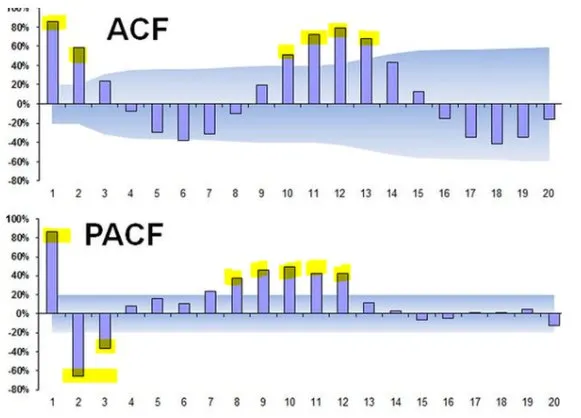


#### Stationarity
A stationary time series is one whose properties do not depend on the time at which the series is observed. 


3 types
- Strict Stationary – Satisfies the mathematical definition of a stationary process. Mean, variance & covariance are not a function of time.
- Seasonal Stationary – Series exhibiting seasonality.
- Trend Stationary – Series exhibiting trend.

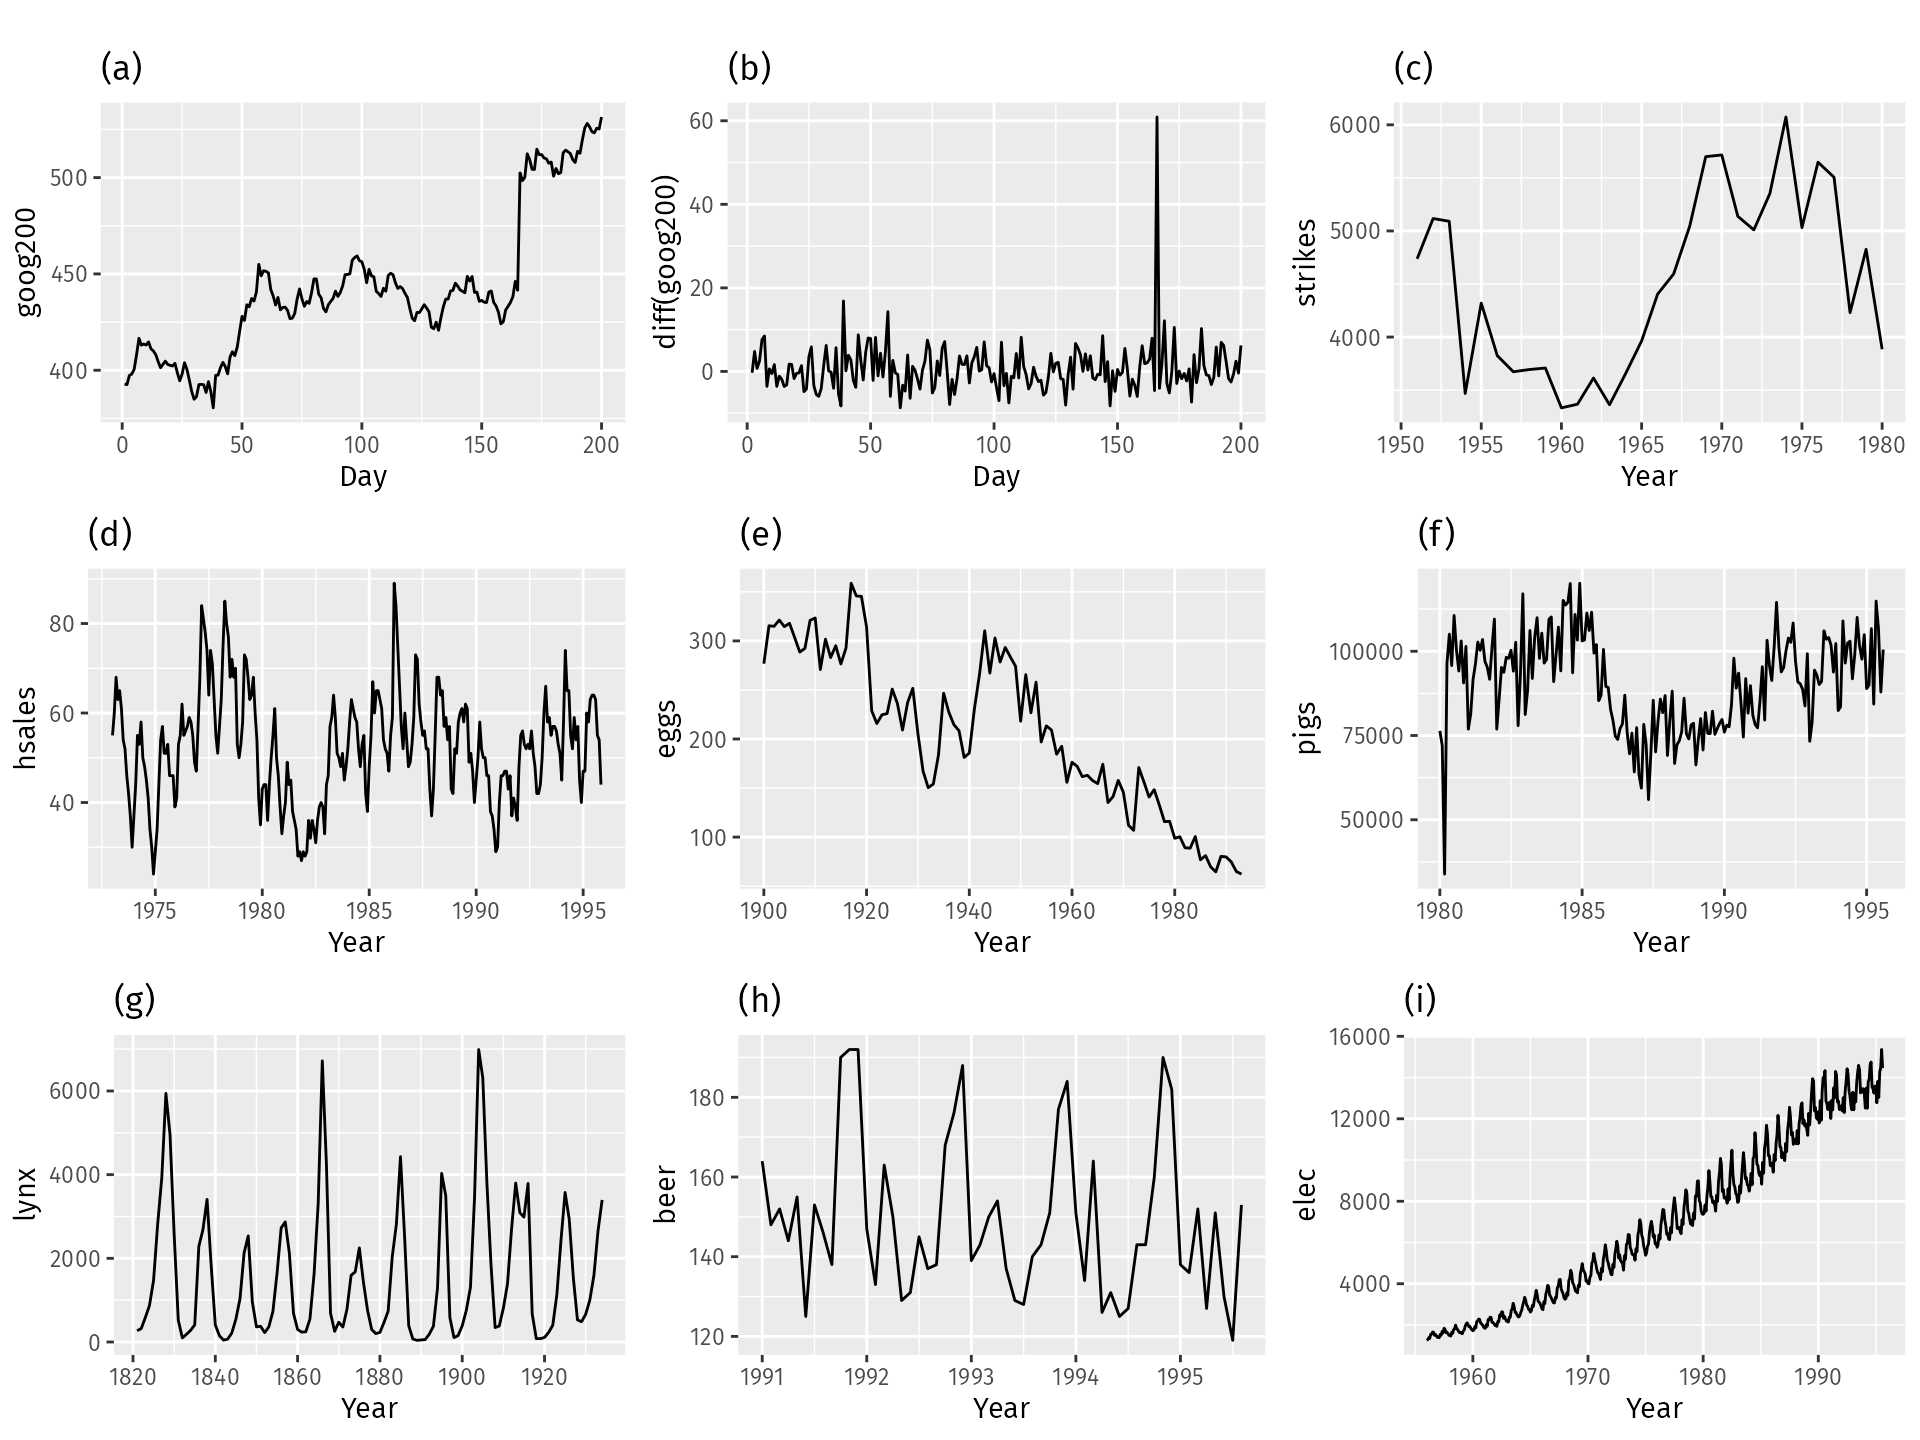
Which of these series are stationary? (a) Google stock price for 200 consecutive days; (b) Daily change in the Google stock price for 200 consecutive days; (c) Annual number of strikes in the US; (d) Monthly sales of new one-family houses sold in the US; (e) Annual price of a dozen eggs in the US (constant dollars); (f) Monthly total of pigs slaughtered in Victoria, Australia; (g) Annual total of lynx trapped in the McKenzie River district of north-west Canada; (h) Monthly Australian beer production; (i) Monthly Australian electricity production. 

more detail: https://otexts.com/fpp2/stationarity.html

#### Adfuller tests for stationarity
Null hypothesis: Non Stationarity exists in the series.

Alternative Hypothesis: Stationarity exists in the series

In [ ]:
   print(store_open.shape)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_results(timeseries):
    ('ADF Test:')
    adf = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print (adfoutput)
adf_results(store_open['Sales'])

Test statistic is the T score interpretation of this score depends on the size of the sample the higher the negative score, the strong the rejectoin of th hypothesis
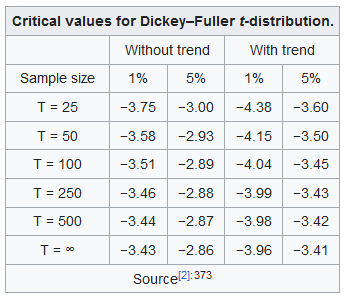


The sample size is over 500 and so the -5 is not great +1 for hypotheis

p score is the probability that the null hypothesis will not be rejected +1 for hypothesis
Number of lags used AIC is the models best pick, you can adjust this. 

overall we can accept the hypthesis that stationarity exists in the data and reject the null

### Summary 
While introducing some new concepts we have also been mocking some of a workflow at a high level. 
A. We brought in some data and performed some basic EDA and prep work
B. We ran an autocorrelation(perhaps a little prematurely) but we found that our data could benefit from Arima models.
C. We Looked at the spread of the data and found that at least on at a high level is looks some what stationary. 
D. We ran and adfuller test to put some metrics behind that hypothesis. 

*So What is next?*
Before jumping right into the arima model we are going to run a few more explorations which will later help us with tuning that model. 


#### Prepare data for Arima Model


    Report the annotated findings with visualizations of your data analysis, including the following elements:

•   the presence or lack of a seasonal component

•   trends

•   auto correlation function

•   spectral density

•   the decomposed time series

•   confirmation of the lack of trends in the residuals of the decomposed series

    Identify an autoregressive integrated moving average (ARIMA) model that takes into account the observed trend and seasonality of the time series data.

    Perform a forecast using the derived ARIMA model.

    Provide the output and calculations of the analysis you performed.

    Provide the code used to support the implementation of the time series model.


In [ ]:
#lets take a look at our data again
store_norm.head()

In [ ]:
store_norm.tail()

In [ ]:
# Let's take a sample of 1 year of data
X = store_norm[['Sales']].loc[:'2013-11-30']
y = store_norm[['Sales']].loc['2014-12-01':]
print('X', X.shape)
print('y', y.shape)

In [ ]:
X

## Whats the diff?
This function basically takes the last row and creats a delta between the two. 
if your data is segmented by year and each row represents a year then it will take that difference. 
row 1 = 10 row 2 = 4 the difference is 6.


OK cool. So what? How is this useful?
What this can do is minimize some of the unpredictible data that can occure in seasonality or events. It does not fully remove it but will smooth it out for better overall predictions. 
In short it is stablizing the mean. 

for this next step we will create a diff for our sales and then run a new visualization that decomposes the data to review seasonality tends and more
https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

regarding the parementer of additive and multiplicative there is a deep dive here on approaching this choice
https://sigmundojr.medium.com/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7

In short 
    The additive model is useful when the seasonal variation is relatively constant over time.
    The multiplicative model is useful when the seasonal variation increases over time.
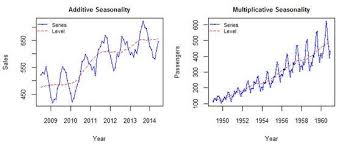

In [ ]:
# Decompose the training set
df_diff = X.diff().dropna()


from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_diff, model='additive') # additive and multiplicative are the options

decomp.plot()
plt.show()

In [ ]:
df_diff

#### seasonal_decompoose
- number of observations
- Trend do you see  an upward or downward trend
- seasonality do you see an cyclical pattern?
- The residual is what's left over after trends and seasonality are removed. Time series models assume that the data is stationary and only the residual component satisfies the conditions for stationarity. 


#### What do we do with this information?
A) you can observe seperate drivers for your data seasonality and trends could mask one another and this splits them apart. 

B) This will give you output to review for tuning you may do to your model. There are a lot of techniques that you will come across on your journeys. For example Diff. What if you kept doing diff over and over and over. Is that a good thing or a bad thing. This is what is known as over smoothing a model. 

c) would you say that seasonality makes up 50% 25% 5% of the data. What would happend to this same data and review if we removed promos, or holidays?

In summary this could be considered EDA in a way as you are trying different things with your data and reviewing the ouput. 

Here is a nice break down with some examples 
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

In [ ]:
# closer look at one of the decompositions
decomp.trend.plot()

### power of specteral density
New topic I'm reviewing: http://web.stanford.edu/class/earthsys214/notes/series.html

Shows the strength of the variations as a function of how frequent. 

Power spectral density function (PSD) shows the strength of the variations(energy) as a function of frequency. In other words, it shows at which frequencies variations are strong and at which frequencies variations are weak.

In [ ]:

'''
plt.psd(X['Sales'])

In [ ]:
# y axis shows the  power vs X access frequency 0.0 is powerful density with low frequency. 

In [ ]:
# diff computes the difference or deltas lets load it 
df_train_diff = X.diff().dropna()
df_train_diff.plot()

### ACF PACF PLOTS

- ACF plots show the correlation between a time series and lagged versions of itself. 
- The ACF plot can be used to identify the number of lags that are needed for a time series model. 
 - For example, if the ACF plot shows a strong correlation between the time series and its lag-1, lag-2, and lag-3 values, then a time series model that includes these lags would likely be a good fit.

detail review https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling

    Look for tail off pattern in either ACF or PACF.
    If tail off at ACF → AR model → Cut off at PACF will provide order p for AR(p).
    If tail off at PACF → MA model → Cut off at ACF will provide order q for MA(q).
    Tail of at both ACF and PACF → ARMA model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(X);

To interpret ACF and PACF plots, we can look for the following patterns:

- A sharp cutoff in the ACF plot at a particular lag suggests that a time series model with a corresponding number 
of lags would be a good fit.
- A slowly decaying ACF plot may indicate the presence of a trend in the data.
- A slowly decaying PACF plot may indicate the presence of seasonality in the data.
- A sharp cutoff in the PACF plot at a particular lag may indicate the presence of a seasonal pattern in the data.


In [ ]:

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(X)

In [ ]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [ ]:
adf_results(df_train_diff['Sales'])

In [ ]:
# quick breakouts discussion how would you interpret these results?

#### choosing p d and q for the arima model
Within Arima models you can adjust autogressive terms, seasonal differences, and lagged forecast errors. these are known as P,D, and Q. model = ARIMA(X, order=(P,D,Q)) the P,D, Q would be adjust to the numbers you choose. 
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X, order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

- p is the number of autogressive terms
- d is the number of non seasonal differences needed for stationary 
- q is the number of lagged forecast errors

The ACF and PACF charts we ran will help us choose those numbers. 

Remember

interpret ACF and PACF plots, we can look for the following patterns:

- A sharp cutoff in the ACF plot at a particular lag suggests that a time series model with a corresponding number of lags would be a good fit.
- A slowly decaying ACF plot may indicate the presence of a trend in the data.
- A slowly decaying PACF plot may indicate the presence of seasonality in the data.
- A sharp cutoff in the PACF plot at a particular lag may indicate the presence of a seasonal pattern in the data.

- excellent article diving into the details of pd and q. 
https://stackoverflow.com/questions/57349032/decide-p-q-values-based-on-acf-and-pacf-graphs-and-identify-parameters-of-sarim

#### Essentially your looking for anything that is outside of the middle blue band. 
- P is the number of significant terms when running a PACF
- D is the smoothing or differencing of the model
- Q is the number of significant terms when running ACF



In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X, order=(7,1,6))
model_fit = model.fit()
print(model_fit.summary())

Forecasting using ARIMA Model

In [ ]:
mae = np.mean(np.abs(model_fit.resid))
print("The mean absolute error is:", round(mae,2))

In [ ]:
model_fit.plot_diagnostics(figsize=(14,10))
plt.show()

In [ ]:
pred = model_fit.get_prediction()
print(pred.summary_frame(alpha=0.05))

In [ ]:
model_fit.forecast(90)

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [ ]:
# prediction for quarter
pred = model_fit.predict(start=640, end=790)
print(pred)

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(store_open['Sales'],order=(1, 1, 1),seasonal_order=(7,1,6,3))
results=model.fit()
store_open['forecast']=results.predict(start=640,end=790,dynamic=True)
store_open[['Sales','forecast']].plot(figsize=(12,8))

TIME SERIES EXTRA 
https://www.kaggle.com/code/bextuychiev/every-pandas-function-to-manipulate-time-series

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
#### Loading the data and setting the DateTimeIndex

In [ ]:
data = pd.read_csv('C://Users//Matth//OneDrive//Desktop/DATA//time_series_train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head(100)

Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per department

Plot the rolling_mean for Weekly_Sales. What general trends do you observe?

Compute the 1, 2, 52 autocorrelations for Weekly_Sales and/or create an autocorrelation plot.

Split the weekly sales data in a training and test set - using 75% of the data for training. Remember this is not a typical test/train random split but rather splitting the time series data into chuncks chronologically.

Plot the residuals - where are their significant errors.

Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.